<a href="https://colab.research.google.com/github/Hernan1787/Etapa-ll-/blob/main/Etapa_II_Taller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libreries

In [ ]:
!pip install face_recognition         # Install face_recognition package using pip
import face_recognition
import cv2                           # Import OpenCV
import numpy as np
import pickle
from matplotlib import pyplot as plt  # pyplot

from google.colab import drive
drive.mount('/content/drive')

# ipywidgets packages
import ipywidgets as widgets
from IPython.display import display, clear_output

# Live Streaming dependencies
from IPython.display import Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time
!pip install pytz
import datetime
import pytz
local_tz = pytz.timezone('America/Costa_Rica')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566171 sha256=1a880fc6ebb864aae16a72b152a196e6feab86155583ded4eab877fd3d026666
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models
Mounted at /content/drive


# Global lists

In [ ]:
#Rostros registrados
registered_faces = {}

#Listas principales
lista_profesores = [] #Lista master de profesores
lista_estudiantes = [] #Lista master de Estudiantes
lista_miselaneos = [] #Lista master de miselaneos
lista_aulas = [] #Lista master de aulas
lista_cursos = [] #Lista master de cursos

lista_estudiantes_cursos = [] #Lista master de estudiantes matriculados

lista_pres = [] #Lista temporal de asistencia
lista_consulta_6 = [] #Lista master de informacion consulta 6
lista_consulta_9 = [] #Lista master de informacion consulta 9
lista_imagenes = []

lista_presentes_cursos = []



In [ ]:
class professor():
  def __init__(self, name, ID, birthday, nacionality, age, sex, phone_numbers, emails, adress, specialty):
    """
      Description: people's data

      Params: limits, minimums, quantities

      Returns: None

    """
    self.name = name
    self.ID = ID
    self.birthday = birthday
    self.sex = sex
    self.age = age
    self.nacionality = nacionality
    self.phone_numbers = phone_numbers
    self.emails = emails
    self.adress = adress
    self.specialty = specialty


In [ ]:
class student():
  def __init__(self, name, ID,  birthday, nacionality, age, sex, phone_numbers, emails, adress, career):
    """
      Description: people's data

      Params: limits, minimums, quantities

      Returns:None

    """
    self.name = name
    self.ID = ID
    self.birthday = birthday
    self.age = age
    self.sex = sex
    self.nacionality = nacionality
    self.phone_numbers = phone_numbers
    self.emails = emails
    self.adress = adress
    self.career = career

In [ ]:
class miscellaneous():
  def __init__(self, name, ID, nacionality, birthday, age, sex, phone_numbers, emails, adress, shift):
    """
      Description:people's data

      Params: limits, minimums, quantities

      Returns:None

    """
    self.name = name
    self.ID = ID
    self.birthday = birthday
    self.age = age
    self.sex = sex
    self.nacionality = nacionality
    self.phone_numbers = phone_numbers
    self.emails = emails
    self.adress = adress
    self.shift = shift

In [ ]:
class clasrooms():
    def __init__(self, room_num, miselanium):
      """
        Description: people's data

        Params: limits, minimums, quantities

        Returns:None

      """
      self.room_num = room_num
      self.miselanium = miselanium



In [ ]:
class course():
  def __init__(self, code, name, period, career,  students_list, professor_list, schedule, class_room):
    """
      Description: people's data

      Params: limits, minimums, quantities

      Returns:None

    """
    self.code = code
    self.name = name
    self.period = period
    self.career = career
    self.students_list = students_list
    self.professor_list = professor_list
    self.schedule = schedule
    self.class_room = class_room

In [ ]:
def cargar_base_de_datos():
   """
  Params:
          Upload information from google drive.
  Returns:
          Fill in the global lists.
   """

   with open("/content/drive/MyDrive/Base_de_datos_taller/rostros.bin", "rb") as tf:
    global registered_faces
    registered_faces = pickle.load(tf)
   with open("/content/drive/MyDrive/Base_de_datos_taller/profesores.bin", "rb") as p:
    global lista_profesores
    lista_profesores = pickle.load(p)
   with open("/content/drive/MyDrive/Base_de_datos_taller/estudiantes.bin", "rb") as e:
    global lista_estudiantes
    lista_estudiantes = pickle.load(e)
   with open("/content/drive/MyDrive/Base_de_datos_taller/miselaneos.bin", "rb") as m:
    global lista_miselaneos
    lista_miselaneos = pickle.load(m)
   with open("/content/drive/MyDrive/Base_de_datos_taller/aulas.bin", "rb") as a:
    global lista_aulas
    lista_aulas = pickle.load(a)
   with open("/content/drive/MyDrive/Base_de_datos_taller/cursos.bin", "rb") as c:
    global lista_cursos
    lista_cursos = pickle.load(c)

cargar_base_de_datos()


In [ ]:
with open("content/drive/MyDrive/Base_de_datos_taller/consulta_6.bin", "rb") as pre:
    global lista_consulta_6
    lista_consulta_6 = pickle.load(pre)
   with open("content/drive/MyDrive/Base_de_datos_taller/consulta_6.bin", "rb") as pre2:
    global lista_consulta_9
    lista_consulta_9 = pickle.load(pre2)


# Dependencies

In [ ]:
def check_if_face_registered(face_encoding):
  for _, registered_face in registered_faces.items():
    if True in face_recognition.compare_faces([face_encoding], registered_face):
      return True
  return False

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 800, 600);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 800; //video.videoWidth;
      captureCanvas.height = 600; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

In [ ]:
# JavaScript code to stop the webcam stream
js_stop_stream = """
    const stream = video.srcObject;
    const tracks = stream.getTracks();

    tracks.forEach(function(track) {
        track.stop();
    });

    video.srcObject = null;
    div.style.display = 'none';  // Hide the container
"""

# Function to stop the video streaming
def stop_video_stream():
    display(Javascript(js_stop_stream))

# Registration of people





# Professors

In [ ]:
"""collects information from teachers, then saves and records the faces."""
lista_tel_prof = []
lista_email_prof = []
cedula = input("Digite el numero de cedula: ")
nacimiento = input("Digite la fecha de nacimiento: ")
edad = int(input("Digite la edad del profesor: "))
sexo = input("Genero : ")
nacionalidad = input("Digite la nacionalidad: ")
cant = int(input("Digite la cantidad de numeros de telefono que quiere agregar: "))
cont = 0
while cont < cant:
  telefono = input("Digite el numero de telefono ")
  lista_tel_prof.append(telefono)
  cont+=1
while True:
  email = input("Digite el email: ")
  lista_email_prof.append(email)
  otr = input("Si desea agregar otro email digite 'si', si no digite 'no'")
  if otr != "si":
    break
direccion = input("Digite lugar de residencia: ")
especialidad = input("Especialidad del profesor: ")


# Create a text input widget for the name
name_input = widgets.Text(
    placeholder='Digite su nombre',
    description='Nombre:',
    disabled=False
)

# Create a file upload widget
upload_button = widgets.FileUpload(
    accept='image/*',
    multiple=False,
    description='Subir imagen'
)

or_text = widgets.HTML(
    value=" or "
)

# Create a button to trigger face registration
register_button = widgets.Button(description='Registrar rostro')

# Create a button to trigger image capture
capture_button = widgets.Button(description='Tomar Foto')

# Create an output widget to display the uploaded or captured face image
output = widgets.Output()

# Initialize variables to store the uploaded image and name
uploaded_image_data = None
registered_name = None

# Define a function to handle image upload
def handle_upload(change):
    global uploaded_image_data
    uploaded_filename = list(upload_button.value.keys())[0]
    uploaded_image_data = upload_button.value[uploaded_filename]['content']

    with output:
        clear_output()
        display(widgets.Image(value=uploaded_image_data))

    # Assuming uploaded_image_data is binary image data in bytes
    image_array = np.frombuffer(uploaded_image_data, np.uint8)
    image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

    # Convert the image to RGB format
    uploaded_image_data = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def handle_capture(button):
  global uploaded_image_data
  # start streaming video from webcam
  video_stream()
  js_reply = video_frame("Capturando...", "")

  stop_video_stream()  # Stop the video stream after capturing the frame

  if not js_reply:
    with output:
      clear_output()
      print("Error en captura de imagen!")

  # convert JS response to OpenCV Image
  uploaded_image_data = js_to_image(js_reply["img"])

  with output:
    clear_output()
    # Encode the captured frame as PNG
    _, buffer = cv2.imencode('.png', uploaded_image_data)

    # Convert the encoded image to bytes
    image_bytes = buffer.tobytes()
    display(widgets.Image(value=image_bytes))

# Define a function to handle face registration
def handle_register(button):
    global registered_name

    if uploaded_image_data is not None:
        registered_name = name_input.value

        # Detect faces in the frame
        face_locations = face_recognition.face_locations(uploaded_image_data)

        # If there is no face, raise a popup window
        if len(face_locations) == 0:
            with output:
              clear_output()
              print("No se detectaron rostros!")
              return

        # If there is more than one face, raise a popup window
        if len(face_locations) > 1:
            with output:
              clear_output()
              print("Se detecta mas de un rostro en la imagen!")
              return

        # Get the face encodings
        face_encodings = face_recognition.face_encodings(uploaded_image_data)

        # Check if the face is registered
        if check_if_face_registered(face_encodings[0]):
            with output:
              clear_output()
              print("El rostro ya esta registrado!")
              return

        with output:
            clear_output()
            registered_faces[registered_name] = face_encodings[0]

        profe = professor(registered_name, cedula, nacimiento, nacionalidad, edad, sexo,  lista_tel_prof, lista_email_prof, direccion, especialidad)
        lista_profesores.append(profe)
        try:
           with open("/content/drive/MyDrive/Base_de_datos_taller/rostros.bin", "wb") as tf:
             pickle.dump(registered_faces,tf)
           with open("/content/drive/MyDrive/Base_de_datos_taller/profesores.bin", "wb") as p:
             pickle.dump(lista_profesores,p)
             print(f"El profesor '{registered_name}' se ha registrado correctamente.")

        except Exception as e:
              print(f"Error al guardar el archivo: {e}")

upload_button.observe(handle_upload, names='value')
capture_button.on_click(handle_capture)
register_button.on_click(handle_register)

# Create a container for the widgets
container = widgets.VBox([name_input, widgets.HBox([upload_button, or_text, capture_button]), register_button, output])

# Display the container
display(container)


# Students

In [ ]:
"""collects information from students, then saves and records the face."""

list_tel_est = []
lista_email_est = []
cedula = input("Digite el numero de cedula: ")
nacimiento = input("Digite la fecha de nacimiento: ")
edad = int(input("Digite la edad del estudiante: "))
sexo = input("Genero : ")
nacionalidad = input("Digite la nacionalidad: ")
cant = int(input("Digite la cantidad de numeros de telefono que quiere agregar: "))
cont = 0
while cont < cant:
  telefono = input("Digite el numero de telefono ")
  list_tel_est.append(telefono)
  cont+=1

while True:
  email = input("Digite el email: ")
  lista_email_est.append(email)
  otr = input("Si desea agregar otro email digite 'si', si no digite 'no'")
  if otr != "si":
    break

direccion = input("Digite lugar de residencia: ")

carrera = input("Digite carrera que cursa: ")

# Create a text input widget for the name
name_input = widgets.Text(
    placeholder='Digite su nombre',
    description='Nombre:',
    disabled=False
)

# Create a file upload widget
upload_button = widgets.FileUpload(
    accept='image/*',
    multiple=False,
    description='Subir imagen'
)

or_text = widgets.HTML(
    value=" or "
)

# Create a button to trigger face registration
register_button = widgets.Button(description='Registrar rostro')

# Create a button to trigger image capture
capture_button = widgets.Button(description='Tomar imagen')

# Create an output widget to display the uploaded or captured face image
output = widgets.Output()

# Initialize variables to store the uploaded image and name
uploaded_image_data = None
registered_name = None

# Define a function to handle image upload
def handle_upload(change):
    global uploaded_image_data
    uploaded_filename = list(upload_button.value.keys())[0]
    uploaded_image_data = upload_button.value[uploaded_filename]['content']

    with output:
        clear_output()
        display(widgets.Image(value=uploaded_image_data))

    # Assuming uploaded_image_data is binary image data in bytes
    image_array = np.frombuffer(uploaded_image_data, np.uint8)
    image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

    # Convert the image to RGB format
    uploaded_image_data = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def handle_capture(button):
  global uploaded_image_data
  # start streaming video from webcam
  video_stream()
  js_reply = video_frame("Capturando...", "")

  stop_video_stream()  # Stop the video stream after capturing the frame

  if not js_reply:
    with output:
      clear_output()
      print("Error en captura de imagen!")

  # convert JS response to OpenCV Image
  uploaded_image_data = js_to_image(js_reply["img"])

  with output:
    clear_output()
    # Encode the captured frame as PNG
    _, buffer = cv2.imencode('.png', uploaded_image_data)

    # Convert the encoded image to bytes
    image_bytes = buffer.tobytes()
    display(widgets.Image(value=image_bytes))

# Define a function to handle face registration
def handle_register(button):
    global registered_name

    if uploaded_image_data is not None:
        registered_name = name_input.value

        # Detect faces in the frame
        face_locations = face_recognition.face_locations(uploaded_image_data)

        # If there is no face, raise a popup window
        if len(face_locations) == 0:
            with output:
              clear_output()
              print("No se detectaron rostros!")
              return

        # If there is more than one face, raise a popup window
        if len(face_locations) > 1:
            with output:
              clear_output()
              print("Se detecta mas de un rostro en la imagen!")
              return

        # Get the face encodings
        face_encodings = face_recognition.face_encodings(uploaded_image_data)

        # Check if the face is registered
        if check_if_face_registered(face_encodings[0]):
            with output:
              clear_output()
              print("El rostro ya esta registrado!")
              return

        with output:
            clear_output()
            registered_faces[registered_name] = face_encodings[0]
        studen = student(registered_name, cedula, nacimiento, nacionalidad, edad, sexo, list_tel_est, lista_email_est, direccion, carrera)
        lista_estudiantes.append(studen)
        try:
           with open("/content/drive/MyDrive/Base_de_datos_taller/rostros.bin", "wb") as tf:
              pickle.dump(registered_faces,tf)
           with open("/content/drive/MyDrive/Base_de_datos_taller/estudiantes.bin", "wb") as e:
              pickle.dump(lista_estudiantes,e)
              print(f"El estudiante '{registered_name}' se ha registrado correctamente.")
        except Exception as e:
              print(f"Error al guardar el archivo: {e}")

upload_button.observe(handle_upload, names='value')
capture_button.on_click(handle_capture)
register_button.on_click(handle_register)

# Create a container for the widgets
container = widgets.VBox([name_input, widgets.HBox([upload_button, or_text, capture_button]), register_button, output])

# Display the container
display(container)

# Miscellaneous

In [ ]:
"""collects the miscellaneous information, then saves and records the face."""
lista_tel_mis = []
lista_email_mis = []
cedula = input("Digite el numero de cedula: ")
nacimiento = input("Digite la fecha de nacimiento: ")
edad = int(input("Digite la edad del miselaneo: "))
sexo = input("Genero : ")
nacionalidad = input("Digite la nacionalidad: ")
cant = int(input("Digite la cantidad de numeros de telefono que quiere agregar: "))
cont = 0
while cont < cant:
  telefono = input("Digite el numero de telefono ")
  lista_tel_mis.append(telefono)
  cont+=1

while True:
  email = input("Digite el email: ")
  lista_email_mis.append(email)
  otr = input("Si desea agregar otro email digite 'si', si no digite 'no'")
  if otr != "si":
    break


direccion = input("Digite lugar de residencia: ")

turno = input("Digite el turno: ")


# Create a text input widget for the name
name_input = widgets.Text(
    placeholder='Digite su nombre',
    description='Nombre:',
    disabled=False
)

# Create a file upload widget
upload_button = widgets.FileUpload(
    accept='image/*',
    multiple=False,
    description='Subir imagen'
)

or_text = widgets.HTML(
    value=" or "
)

# Create a button to trigger face registration
register_button = widgets.Button(description='Registrar rostro')

# Create a button to trigger image capture
capture_button = widgets.Button(description='Tomar imagen')

# Create an output widget to display the uploaded or captured face image
output = widgets.Output()

# Initialize variables to store the uploaded image and name
uploaded_image_data = None
registered_name = None

# Define a function to handle image upload
def handle_upload(change):
    global uploaded_image_data
    uploaded_filename = list(upload_button.value.keys())[0]
    uploaded_image_data = upload_button.value[uploaded_filename]['content']

    with output:
        clear_output()
        display(widgets.Image(value=uploaded_image_data))

    # Assuming uploaded_image_data is binary image data in bytes
    image_array = np.frombuffer(uploaded_image_data, np.uint8)
    image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

    # Convert the image to RGB format
    uploaded_image_data = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def handle_capture(button):
  global uploaded_image_data
  # start streaming video from webcam
  video_stream()
  js_reply = video_frame("Capturando...", "")

  stop_video_stream()  # Stop the video stream after capturing the frame

  if not js_reply:
    with output:
      clear_output()
      print("Error en captura de imagen!")

  # convert JS response to OpenCV Image
  uploaded_image_data = js_to_image(js_reply["img"])

  with output:
    clear_output()
    # Encode the captured frame as PNG
    _, buffer = cv2.imencode('.png', uploaded_image_data)

    # Convert the encoded image to bytes
    image_bytes = buffer.tobytes()
    display(widgets.Image(value=image_bytes))

# Define a function to handle face registration
def handle_register(button):
    global registered_name

    if uploaded_image_data is not None:
        registered_name = name_input.value

        # Detect faces in the frame
        face_locations = face_recognition.face_locations(uploaded_image_data)

        # If there is no face, raise a popup window
        if len(face_locations) == 0:
            with output:
              clear_output()
              print("No se detectaron rostros!")
              return

        # If there is more than one face, raise a popup window
        if len(face_locations) > 1:
            with output:
              clear_output()
              print("Se detecta mas de un rostro en la imagen!")
              return

        # Get the face encodings
        face_encodings = face_recognition.face_encodings(uploaded_image_data)

        # Check if the face is registered
        if check_if_face_registered(face_encodings[0]):
            with output:
              clear_output()
              print("El rostro ya esta registrado!")
              return

        with output:
            clear_output()
            registered_faces[registered_name] = face_encodings[0]
        misce = miscellaneous(registered_name, cedula, nacimiento, nacionalidad, edad, sexo, lista_tel_mis, lista_email_mis, direccion, turno)
        lista_miselaneos.append(misce)
        try:
            with open("/content/drive/MyDrive/Base_de_datos_taller/rostros.bin", "wb") as tf:
              pickle.dump(registered_faces,tf)
            with open("/content/drive/MyDrive/Base_de_datos_taller/miselaneos.bin", "wb") as m:
              pickle.dump(lista_miselaneos,m)
              print(f"La persona '{registered_name}' se ha guardado correctamente.")
        except Exception as e:
              print(f"Error al guardar el archivo: {e}")

upload_button.observe(handle_upload, names='value')
capture_button.on_click(handle_capture)
register_button.on_click(handle_register)

# Create a container for the widgets
container = widgets.VBox([name_input, widgets.HBox([upload_button, or_text, capture_button]), register_button, output])

# Display the container
display(container)

# Registration of class rooms and courses

# Class rooms

In [ ]:
# Registro de aulas
def registro_aulas():
  cont = 0
  lista_mis = []
  nombre = ""
  numero_aula = input("Digite el nunmero de aula: ")
  cant = int(input("Digite la cantidad de miselaneos encargados del aula: "))
  while cont<cant:
    ver = True
    while ver == True:
      miselaneo_aula = input("Digite el nombre del miselaneo encargado: ")
      for nom_mis in lista_miselaneos:
        if miselaneo_aula == nom_mis.name:
          lista_mis.append(nom_mis.name)
          ver = False
    if ver == False:
      cont+=1
    else:
      print("Error! Miselaneo no encontrado")
  room = clasrooms( numero_aula, lista_mis)
  lista_aulas.append(room)
  with open("/content/drive/MyDrive/Base_de_datos_taller/aulas.bin", "wb") as a:
      pickle.dump(lista_aulas,a)


# Courses

In [ ]:
# Registro de cursos
def registro_cursos():
# Informacion que se pide al usuario
  contador_estudiantes = 0
  lista_estudiantes_matriculados = []
  contador_profesores = 0
  lista_prof_imp = []
  codigo = input("Digite el codigo del curso: ")
  nombre = input("Digite el nombre del curso: ")
  periodo = input("Digite el periodo en el que se imparte: ")
  escuela = input("Digite a que escuela a la que pertenece: ")
  horario = input("Digite el horario en el que se imparte: ")
# Agregar estudiantes al curso
  cantidad_estudiantes = int(input("Digite la cantidad de estudiates a matricular: "))

  while contador_estudiantes < cantidad_estudiantes:
    ver = True
    while ver == True:
      estudiantes = input("Digite el nombre del estudiante: ")
      for nom_est in lista_estudiantes:
        if estudiantes == nom_est.name:
          lista_estudiantes_matriculados.append(nom_est.name)
          ver = False
      if ver == False:
        contador_estudiantes+=1
      else:
        print("Error! Estudiante no encontrado")
# Agregar profesores al curso
  cantidad_profesores = int(input("Digite la cantidad de profesores que imparten el curso: "))

  while contador_profesores < cantidad_profesores:
    ver1 = True
    while ver1 == True:
      profesores = input("Digite el nombre del profesor: ")
      for nom_prof in lista_profesores:
        if profesores == nom_prof.name:
          lista_prof_imp.append(nom_prof.name)
          ver1 = False
      if ver1 == False:
        contador_profesores+=1
      else:
        print("Error! Profesor no encontrado")
# Agregar un aula para el curso
  ver = True
  while ver == True:
    num_aula = input("Digite el numero de aula: ")
    for aula in lista_aulas:
      if num_aula == aula.room_num:
        aula = aula.room_num
        ver = False
    if ver == True:
      print("Error! Aula no existente")
  curso = course(codigo, nombre, periodo, escuela, lista_estudiantes_matriculados, lista_prof_imp, horario, aula)
  lista_cursos.append(curso)
  with open("/content/drive/MyDrive/Base_de_datos_taller/cursos.bin", "wb") as c:
      pickle.dump(lista_cursos,c)
      print("Curso guardado con exito!")


In [ ]:
registro_cursos()

Digite el codigo del curso: intro
Digite el nombre del curso: intro
Digite el periodo en el que se imparte: 11
Digite a que escuela a la que pertenece: compu
Digite el horario en el que se imparte: lol
Digite la cantidad de estudiates a matricular: 1
Digite el nombre del estudiante: Mathew
Digite la cantidad de profesores que imparten el curso: 1
Digite el nombre del profesor: Norman
Digite el numero de aula: a12
Curso guardado con exito!


# Class attendance

In [ ]:
def face_recor():
  """
  Params:
        records the time, creates a list of the people it recognized and stores them in list_images stores the pack and the person's name.

  Returns:
        returns current_time.

  """
  # start streaming video from webcam
  lista_precentes = []

  video_stream()
  # label for video
  label_html = 'Capturando...'
  bbox = ''
  js_reply = video_frame(label_html, bbox)
  if not js_reply:
    pass

    # convert JS response to OpenCV Image
  img = js_to_image(js_reply["img"])

  #print(img)
  current_time = datetime.datetime.now(local_tz).strftime("%Y-%m-%d %H:%M:%S")
  # Draw the current time on the frame
  cv2.putText(
        img,
        current_time,
        (10, 30),  # Position to display the time (you can adjust this)
        cv2.FONT_HERSHEY_SIMPLEX,
        0.7,  # Font scale
        (0, 0, 0),  # Text color (white)
        2,  # Thickness of the text
        cv2.LINE_AA,
  )
    # Get the face locations from the frame

  face_locations = face_recognition.face_locations(img)

    # For each face in the frame
  for (top, right, bottom, left) in face_locations:
        # Draw a rectangle around the face
      cv2.rectangle(
            img,
            (left, top),
            (right, bottom),
            (0, 0, 255),
            2,
        )
      face_encoding = face_recognition.face_encodings(img, [(top, right, bottom, left)])[0]


        # Compare the face encoding to the faces in the database
      matches = face_recognition.compare_faces(list(registered_faces.values()), face_encoding)

        # If there is a match
      if True in matches:
            # Get the index of the match
          match_index = matches.index(True)

            # Get the name of the match
          match_name = list(registered_faces.keys())[match_index]
          lista_pres.append(match_name)
          img_path = "/content/drive/MyDrive/Base_de_datos_taller/" + match_name
          #image_path =
            # Draw the name of the match on the frame
          cv2.putText(
                img,
                match_name,
                (left, top - 10),
                cv2.FONT_HERSHEY_SIMPLEX,
                1,
                (0, 0, 255),
                2,
                cv2.LINE_AA,
            )

      else:
            # Draw unknown on the frame
            cv2.putText(
                img,
                "No registrado!",
                (left, top - 10),
                cv2.FONT_HERSHEY_SIMPLEX,
                1,
                (0, 0, 255),
                2,
                cv2.LINE_AA,
            )

    # Show image

  lista_imagenes.append({match_name:{img_path:img}})
  plt.imshow(img)
  plt.show()

  stop_video_stream()
  return current_time


In [ ]:
def match_precentes():
  """
  Params:
      This function performs matching of registered functions in order to filter information, and thus fill the lists of queries 6 and 9.


  Returns:
        None.

  """
  lista_pres.clear()
  lista_matriculados = []
  mat_nom = " "
  lista_d = []
  dic_consulta_9 = {}
  switch = True
  v = True

  curso = input("Digite el codigo del curso a pasar lista: ")
  print("\n")
  for x in lista_cursos:
    if x.code == curso:
      if switch == True:
        date_time = face_recor()
        switch = False
      for estud in x.students_list:
        for nom in lista_pres:
          if nom == estud:
            lista_d.append(nom)
    lista_consulta_6.append({curso:{date_time: list(lista_d)}})

  print(f"\nLista de asistencia: {lista_d}\n")
  if len(lista_consulta_9) >= 1:
    for dic in lista_consulta_9:
      for x,y in dic.items():
        if x == curso:
          for n in lista_d:
            y.append(n)
        else:
          v = False
      if v == False:
        dic[curso] = lista_d
  elif len(lista_consulta_9) == 0:
    dic_consulta_9[curso] = lista_d
    lista_consulta_9.append(dic_consulta_9)

  with open("/content/drive/MyDrive/Base_de_datos_taller/consulta_6.bin", "wb") as pre:
      pickle.dump(lista_consulta_6,pre)
  with open("/content/drive/MyDrive/Base_de_datos_taller/consulta_9.bin", "wb") as pre2:
      pickle.dump(lista_consulta_9,pre2)



Digite el codigo del curso a pasar lista: intro




<IPython.core.display.Javascript object>

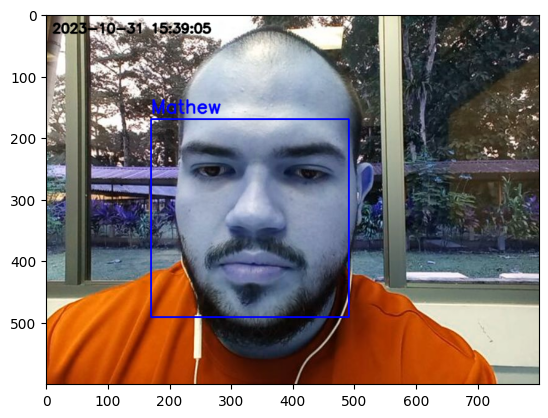

<IPython.core.display.Javascript object>


Lista de asistencia: ['Mathew']



In [ ]:
match_precentes()

# Consultas

In [ ]:
def consultas_profes():
  """
  Description: Print the list of teachers in an orderly fashion.


  Params:
      None


  Returns:
      None


    """

  for profe in lista_profesores:
    nombre = profe.name
    cedula = profe.ID
    nacimiento = profe.birthday
    nacionalidad = profe.nacionality
    telefono = profe.phone_numbers
    edad = profe.age
    genero = profe.sex
    email = profe.emails
    direccion = profe.adress
    especialidad = profe.specialty

    print(f"Profesor: {nombre}\nCedula: {cedula}\nfecha de nacimiento: {nacimiento}\nGenero: {genero}\nNacionalidad: {nacionalidad}\nNumero/s de telefono: {telefono}\nEdad: {edad}\nCorreo/s: {email}\nDireccion: {direccion}\nEspecialidad: {especialidad}\n")



In [ ]:
consultas_profes()

In [ ]:
def consulta_estudiantes():
    """
    Description: Print the list of students in an orderly fashion.


      Params:
      None


     Returns:
      None


    """
    for estud in lista_estudiantes:
      nombre = estud.name
      cedula = estud.ID
      nacimiento = estud.birthday
      genero = estud.sex
      nacionalidad = estud.nacionality
      telefono = estud.phone_numbers
      edad = estud.age
      email = estud.emails
      direccion = estud.adress
      carrera = estud.career
      print(f"Estudiante: {nombre}\nCedula: {cedula}\nfecha de nacimiento: {nacimiento}\nGenero: {genero}\nNacionalidad: {nacionalidad}\nNumero/s de telefono: {telefono}\nEdad: {edad}\nCorreo/s: {email}\nDireccion: {direccion}\nCarrera: {carrera}\n")


In [ ]:
consulta_estudiantes()

Estudiante: Mathew
Cedula: cedu
fecha de nacimiento: naci
Genero: gen
Nacionalidad: nacio
Numero/s de telefono: ['cel']
Edad: 23
Correo/s: ['email']
Direccion: resi
Carrera: carrera



In [ ]:
def consulta_miselaneos():
    """
   Description: Print the miscellaneous list in an orderly fashion.


   Params:
      None


    Returns:
      None


    """

    for mis in lista_miselaneos:
      nombre = mis.name
      cedula = mis.ID
      nacimiento = mis.birthday
      genero = mis.sex
      nacionalidad = mis.nacionality
      telefono = mis.phone_numbers
      edad = mis.age
      email = mis.emails
      direccion = mis.adress
      turno = mis.shift
      print(f"Miselaneo: {nombre}\nCedula: {cedula}\nfecha de nacimiento: {nacimiento}\nGenero: {genero}\nNacionalidad: {nacionalidad}\nNumero/s de telefono: {telefono}\nEdad: {edad}\nCorreo/s: {email}\nDireccion: {direccion}\nTurno: {turno}\n")


In [ ]:
 consulta_miselaneos()

Miselaneo: Isabel
Cedula: cedu
fecha de nacimiento: nacio
Genero: gen
Nacionalidad: naci
Numero/s de telefono: ['cel']
Edad: 24
Correo/s: ['email']
Direccion: resi
Turno: turno



In [ ]:
def consulta_aulas():
    """
  Description: Prints the information in an orderly fashion of classrooms.


  Params:
      None


  Returns:
      None


    """
    for aula in lista_aulas:
      numero = aula. room_num
      list_mis = aula.miselanium
      print(f"Numero de aula: {numero}\nLista de miselaneos: {list_mis}")


In [ ]:
consulta_aulas()

Numero de aula: a12
Lista de miselaneos: ['Isabel']


In [ ]:
def consulta_cursos():
  """
  Description: scrolls through the list of students, teachers, miscellaneous and
  classrooms to filter the information according to what each course has stored.


  Params:
      None


  Returns:
      None


  """
  for dic in lista_cursos:
    codigo = dic.code
    curso = dic.name
    periodo = dic.period
    escuela = dic.career
    aula = dic.class_room
    lista_prof = dic.professor_list
    print(f"************ Informacion de {curso} ************\n")
    print(f"Codigo del curso: {codigo}\nNombre del curso: {curso}\nPeriodo: {periodo}\nEscuela: {escuela}\nAula: {aula}\n")
    print(f"************ Estudiantes {curso} ************\n")
    for es in dic.students_list:
      for x in lista_estudiantes:
          if x.name == es:
            nombre = x.name
            cedula = x.ID
            nacimiento = x.birthday
            genero = x.sex
            nacionalidad = x.nacionality
            telefono = x.phone_numbers
            edad = x.age
            email = x.emails
            direccion = x.adress
            carrera = x.career
            print(f"Estudiante: {nombre}\nCedula: {cedula}\nfecha de nacimiento: {nacimiento}\nGenero: \nNacionalidad: {nacionalidad}\nNumero/s de telefono: {telefono}\nEdad: {edad}\nCorreo/s: {email}\nDireccion: {direccion}\nCarrera: {carrera}\n")
    print(f"************ Profesores {curso} ************\n")
    for pro in lista_prof:
      for dic_p in lista_profesores:
        if dic_p.name == pro:
          nombre = dic_p.name
          cedula = dic_p.ID
          nacimiento = dic_p.birthday
          nacionalida = dic_p.nacionality
          telefono = dic_p.phone_numbers
          edad = dic_p.age
          genero = dic_p.sex
          email = dic_p.emails
          direccion = dic_p.adress
          especialidad = dic_p.specialty
          print(f"Profesor: {nombre}\nCedula: {cedula}\nfecha de nacimiento: {nacimiento}\nGenero: {genero}\nNacionalidad: {nacionalidad}\nNumero/s de telefono: {telefono}\nEdad: {edad}\nCorreo/s: {email}\nDireccion: {direccion}\nEspecialidad: {especialidad}\n")




In [ ]:
consulta_cursos()

In [ ]:
def imprimir_img(nombre):
  """
  Description: prints the image that is related to a name.


  Params:
      "nombre"(lista) contains the names to search for.


  Returns:
      None


  """
  imag = []
  for dicf in lista_imagenes:
    for o,p in dicf.items():
      if o == nombre:
        for c,v in p.items():
          imag.append(v)
  for img in imag:
    plt.imshow(img)

In [ ]:
def consulta_6():
  """
  Description: prints the personal information of students and teachers related to the specific course.


  Params:
      None



  Returns:
      None


  """
  for dic in lista_consulta_6:
    for x,y in dic.items():
      for q,c in y.items():
        print(f"Curso: {x} con {len(c)} estudiantes: {c} Fecha de el reporte: {q}\n")
        print(f"Informacion de los estudiantes:\n")
        for nombres in c:
          for estud in lista_estudiantes:
            nombre = estud.name
            if nombre == nombres:
              nombre = estud.name
              cedula = estud.ID
              nacimiento = estud.birthday
              genero = estud.sex
              nacionalidad = estud.nacionality
              telefono = estud.phone_numbers
              edad = estud.age
              email = estud.emails
              direccion = estud.adress
              carrera = estud.career
              imprimir_img(nombre)
              print(f"Estudiante: {nombre}\nCedula: {cedula}\nfecha de nacimiento: {nacimiento}\nGenero: {genero}\nNacionalidad: {nacionalidad}\nNumero/s de telefono: {telefono}\nEdad: {edad}\nCorreo/s: {email}\nDireccion: {direccion}\nCarrera: {carrera}\n")
        print(f"Informacion del profesor:\n")
        for i in lista_cursos:
          if i.code == x:
            for h in i.professor_list:
              for dic_p in lista_profesores:
                if dic_p.name == h:
                  nombre = dic_p.name
                  cedula = dic_p.ID
                  nacimiento = dic_p.birthday
                  nacionalidad = dic_p.nacionality
                  telefono = dic_p.phone_numbers
                  edad = dic_p.age
                  genero = dic_p.sex
                  email = dic_p.emails
                  direccion = dic_p.adress
                  especialidad = dic_p.specialty
                  print(f"Profesor: {nombre}\nCedula: {cedula}\nfecha de nacimiento: {nacimiento}\nGenero: {genero}\nNacionalidad: {nacionalidad}\nNumero/s de telefono: {telefono}\nEdad: {edad}\nCorreo/s: {email}\nDireccion: {direccion}\nEspecialidad: {especialidad}\n")


Curso: intro con 1 estudiantes: ['Mathew'] Fecha de el reporte: 2023-10-31 15:39:05

Informacion de los estudiantes:

Estudiante: Mathew
Cedula: cedu
fecha de nacimiento: naci
Genero: gen
Nacionalidad: nacio
Numero/s de telefono: ['cel']
Edad: 23
Correo/s: ['email']
Direccion: resi
Carrera: carrera

Informacion del profesor:

Profesor: Norman
Cedula: cedula
fecha de nacimiento: fecha
Genero: gen
Nacionalidad: nation
Numero/s de telefono: ['cel']
Edad: 23
Correo/s: ['email']
Direccion: resi
Especialidad: esp



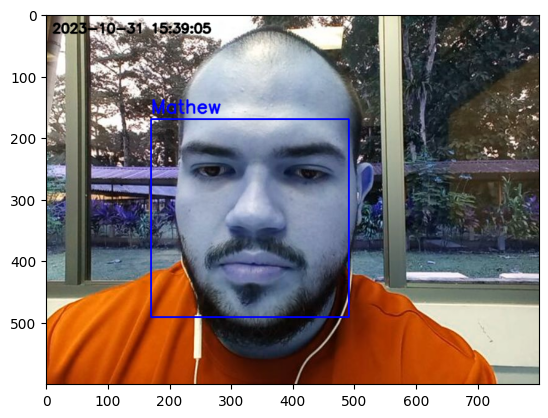

In [ ]:

consulta_6()

In [ ]:
print(lista_estudiantes_cursos)

[]


In [ ]:
def ordenamiento_burbuja(lista):
    """
     Description: bubble sorting is used to sort the list of ages in ascending order.

    Params:
      lista(list) is a list of ages.


    Returns:
    "lista"(list) descending ordered list.
    """

    pasadas=len(lista)-1
    while pasadas>0:
        pos=0
        while pos<pasadas:
            if lista[pos]<lista[pos+1]:
                temp=lista[pos]
                lista[pos]=lista[pos+1]
                lista[pos+1]=temp
            pos=pos+1
        pasadas=pasadas-1
    return lista

In [ ]:
def consulta_7():
  """
  Description:
Print in order from oldest to youngest by age the enrolled students of a course by bubble method.

  Parameters:
      None

  Returns:
      None

  """
  lista_edades = []
  lista_matriculados = []
  lista_estudiantes_ordenados = []
  codigo = input("Digite el codigo del curso: ")
  for dic in lista_cursos:
    lista_matriculados = dic.students_list
    if dic.code == codigo:
      for est in dic.students_list:
        for dicc in lista_estudiantes:
          if dicc.name == est:
            lista_edades.append(int(dicc.age))
  lista_edades_ordenada = ordenamiento_burbuja(lista_edades)
  print(lista_edades)
  for k in lista_edades_ordenada:
    for i in lista_estudiantes:
      for v in lista_matriculados:
        if i.name == v and k == i.age:
          lista_estudiantes_ordenados.append(i)
  for estud in lista_estudiantes_ordenados:
    nombre = estud.name
    cedula = estud.ID
    nacimiento = estud.birthday
    genero = estud.sex
    nacionalidad = estud.nacionality
    telefono = estud.phone_numbers
    edad = estud.age
    email = estud.emails
    direccion = estud.adress
    carrera = estud.career
    print(f"Estudiante: {nombre}\nCedula: {cedula}\nfecha de nacimiento: {nacimiento}\nGenero: {genero}\nNacionalidad: {nacionalidad}\nNumero/s de telefono: {telefono}\nEdad: {edad}\nCorreo/s: {email}\nDireccion: {direccion}\nCarrera: {carrera}\n")


In [ ]:
consulta_7()


Digite el codigo del curso: intro
[23]
Estudiante: Mathew
Cedula: cedu
fecha de nacimiento: naci
Genero: gen
Nacionalidad: nacio
Numero/s de telefono: ['cel']
Edad: 23
Correo/s: ['email']
Direccion: resi
Carrera: carrera



In [ ]:
def mayor_lista(lista):
    """Returns the largest numeric element in a list. Returns None if the list is empty
    Arguments:
        {list} list -- List of numeric values.
    Returns:
        largest {int} -- Largest of the elements in the list.
    """
    if len(lista)==0:
        return (None)
    else:
        mayor=lista[0]
        for x in lista[1:]:
            if x>mayor:
                mayor=x
        return(mayor)

def ordenamiento_insercion(lista):
    """Ordering based on insertions
    Arguments:
        {list} -- Unordered list
    Returns:
        new_list {list} -- Sorted List.
    """
    nueva_lista = []
    while len(lista)>0:
        mayor=mayor_lista(lista)
        nueva_lista.append(mayor)
        lista.remove(mayor)
    return nueva_lista

In [ ]:
def consulta_8():
  """
  Description:
  Print in order from oldest to youngest by age the enrolled students of a course by insertion method.

  Parameters:
      None

  Returns:
      None

  """

  lista_edades = []
  lista_matriculados = []
  lista_estudiantes_ordenados = []
  codigo = input("Digite el codigo del curso: ")
  for dic in lista_cursos:
    lista_matriculados = dic.students_list
    cod = dic.code
    if cod == codigo:
      for est in lista_matriculados:
        for dicc in lista_estudiantes:
          estudiante = dicc.name
          edad = dicc.age
          if estudiante == est:
            lista_edades.append(int(edad))
  lista_edades_ordenada = ordenamiento_insercion(lista_edades)
  for k in lista_edades_ordenada:
    for i in lista_estudiantes:
      estudiant = i.name
      eda = i.age
      for v in lista_matriculados:
        if estudiant == v and k == eda:
          lista_estudiantes_ordenados.append(i)
  for estu in lista_estudiantes_ordenados:
    nombre = estu.name
    cedula = estu.ID
    nacimiento = estu.birthday
    genero = estu.sex
    nacionalidad = estu.nacionality
    telefono = estu.phone_numbers
    edad = estu.age
    email = estu.emails
    direccion = estu.adress
    carrera = estu.career
    print(f"Estudiante: {nombre}\nCedula: {cedula}\nfecha de nacimiento: {nacimiento}\nGenero: {genero}\nNacionalidad: {nacionalidad}\nNumero/s de telefono: {telefono}\nEdad: {edad}\nCorreo/s: {email}\nDireccion: {direccion}\nCarrera: {carrera}\n")




In [ ]:
consulta_8()

Digite el codigo del curso: intro
Estudiante: Mathew
Cedula: cedu
fecha de nacimiento: naci
Genero: gen
Nacionalidad: nacio
Numero/s de telefono: ['cel']
Edad: 23
Correo/s: ['email']
Direccion: resi
Carrera: carrera



In [ ]:
def menor_asis(curso):
  """
  Description:
      searches for the name with the fewest repetitions in a list.


  Parameters:
      "curso"(lista)contains names

  Returns:
      "min_nom"(str)names with fewer repetitions.
  """

  lista_b = None
  global lista_consulta_9
  for dic in lista_consulta_9:
    for x,y in dic.items():
      if x == curso:
        lista_b = list(y)
  min_nom = None
  min_cont = 100000
  name_counts = {}
  for names in lista_b:
      if names in name_counts:
          name_counts[names] += 1
      else:
          name_counts[names] = 1
  for names, cout in name_counts.items():
      if cout < min_cont:
          min_nom = names
          min_cont = cout

  return min_nom

def mayor_asis(curso):
  """
  Description:
      searches for the name with the most repetitions in a list.


  Parameters:
      "curso"(lista)contains names

  Returns:
      "max_nom"(str)names with fewer repetitions.
  """
  lista_m = None
  global lista_consulta_9
  for dic in lista_consulta_9:
    for x,y in dic.items():
      if x == curso:
        lista_m = list(y)
  max_nom = None
  max_cont = 0
  name_conts = {}
  for name in lista_m:
      if name in name_conts:
          name_conts[name] += 1
      else:
          name_conts[name] = 1
      if name_conts[name] > max_cont:
          max_nom = name
          max_cont = name_conts[name]

  return max_nom

In [ ]:
def consulta_9():
  """
  Description:
      Prints the student with appearances on the attendance list in a specific course.


  Parameters:
      None

  Returns:
      None
  """

  curso = input("Digite el codigo de curso: ")
  resul = mayor_asis(curso)
  print(f"\nEl estudiantes con mayor asistencia es:\n")
  for dic in lista_estudiantes:
        if dic.name == resul:
          nombre = dic.name
          cedula = dic.ID
          nacimiento = dic.birthday
          genero = dic.sex
          nacionalidad = dic.nacionality
          telefono = dic.phone_numbers
          edad = dic.age
          email = dic.emails
          direccion = dic.adress
          carrera = dic.career
          print(f"Estudiante: {nombre}\nCedula: {cedula}\nfecha de nacimiento: {nacimiento}\nGenero: {genero}\nNacionalidad: {nacionalidad}\nNumero/s de telefono: {telefono}\nEdad: {edad}\nCorreo/s: {email}\nDireccion: {direccion}\nCarrera: {carrera}\n")


In [ ]:
consulta_9()

Digite el codigo de curso: intro

El estudiantes con mayor asistencia es:

Estudiante: Mathew
Cedula: cedu
fecha de nacimiento: naci
Genero: gen
Nacionalidad: nacio
Numero/s de telefono: ['cel']
Edad: 23
Correo/s: ['email']
Direccion: resi
Carrera: carrera



In [ ]:
def consulta_10():
  """
  Description:
      Prints the student with appearances on the attendance list in a specific course.


  Parameters:
      None

  Returns:
      None
  """

  curso = input("Digite el codigo de curso: ")
  resul = menor_asis(curso)
  print(f"\nEl estudiantes con menor asistencia es:\n")
  for dic in lista_estudiantes:
        if dic.name == resul:
          nombre = dic.name
          cedula = dic.ID
          nacimiento = dic.birthday
          genero = dic.sex
          nacionalidad = dic.nacionality
          telefono = dic.phone_numbers
          edad = dic.age
          email = dic.emails
          direccion = dic.adress
          carrera = dic.career
          print(f"Estudiante: {nombre}\nCedula: {cedula}\nfecha de nacimiento: {nacimiento}\nGenero: {genero}\nNacionalidad: {nacionalidad}\nNumero/s de telefono: {telefono}\nEdad: {edad}\nCorreo/s: {email}\nDireccion: {direccion}\nCarrera: {carrera}\n")


In [ ]:
consulta_10()

Digite el codigo de curso: intro

El estudiantes con menor asistencia es:

Estudiante: Mathew
Cedula: cedu
fecha de nacimiento: naci
Genero: gen
Nacionalidad: nacio
Numero/s de telefono: ['cel']
Edad: 23
Correo/s: ['email']
Direccion: resi
Carrera: carrera



In [ ]:
def consulta_11():
  """
  Description:
      prints the exact date of the most attended course and prints the information of the enrolled students.


  Parameters:
      None

  Returns:
      None
  """
  mayor = 0
  cont = 0
  for dic in lista_consulta_6:
    for x,y in dic.items():
      for v,b in y.items():
        if mayor < len(b):
          mayor = len(b)
  for d in lista_consulta_6:
    for c,v in d.items():
      for h,j in v.items():
        if mayor == len(j):
          print(f"El curso con mayor asistencia es: {c} Fecha: {h}")
          for di in lista_estudiantes:
            cont+=1
            for n in j:
              if n == di.name:
                print(f"con {cont} persona/s\n")
                nombre = di.name
                cedula = di.ID
                nacimiento = di.birthday
                genero = di.sex
                nacionalidad = di.nacionality
                telefono = di.phone_numbers
                edad = di.age
                email = di.emails
                direccion = di.adress
                carrera = di.career
                print(f"Estudiante: {nombre}\nCedula: {cedula}\nfecha de nacimiento: {nacimiento}\nGenero: {genero}\nNacionalidad: {nacionalidad}\nNumero/s de telefono: {telefono}\nEdad: {edad}\nCorreo/s: {email}\nDireccion: {direccion}\nCarrera: {carrera}\n")



In [ ]:
consulta_11()

El curso con mayor asistencia es: intro Fecha: 2023-10-31 15:39:05
con 1 persona/s

Estudiante: Mathew
Cedula: cedu
fecha de nacimiento: naci
Genero: gen
Nacionalidad: nacio
Numero/s de telefono: ['cel']
Edad: 23
Correo/s: ['email']
Direccion: resi
Carrera: carrera



In [ ]:
def particiona_lista(lista):
    """Based on a list returns a sublist with three element, the first one a
    sublist with the elements less than the pivot, second the pivot (last element of the list),
    third a sublist with the elements greater than or equal to the pivot.
    (It is assumed the list have at least 1 element).
    Arguments:
        {list} -- Unordered list
    Returns:
        [minor,pivot,major] {list} -- List with sublist of minor elements, pivot and list with major elements.
    """
    menores=list()
    mayores=list()
    pivote=lista[-1]
    for x in lista[:-1]:
        if x<pivote:
            menores.append(x)
        else:
            mayores.append(x)
    return([menores,pivote,mayores])

def ordenamiento_quickSort(lista):
    """Sort a list using the iterative quicksort algorithm.
    Arguments:
        {list} -- Unordered list.
    Returns:
        {list} -- Sorted list
    """
    if len(lista)>0:
        lista=particiona_lista(lista)
        cont=0
        while cont<len(lista):
            e=lista[cont]
            if type(e)==list:
                if len(e)==0:
                    del lista[cont]
                elif len(e)==1:
                    lista[cont]=e[0]
                    cont = cont + 1
                else:
                    lista=lista[:cont]+particiona_lista(e)+lista[cont+1:]
            else:
                cont=cont+1

    return lista



In [ ]:
def consulta_12():
  """
  Description:
  Print in order from oldest to youngest by age the enrolled students of a course by quickSort method.

  Parameters:
      None

  Returns:
      None

  """

  lista_edades = []
  lista_matriculados = []
  lista_estudiantes_ordenados = []
  codigo = input("Digite el codigo del curso: ")
  for dic in lista_cursos:
    lista_matriculados = dic.students_list
    cod = dic.code
    if cod == codigo:
      for est in lista_matriculados:
        for dicc in lista_estudiantes:
          estudiante = dicc.name
          edad = dicc.age
          if estudiante == est:
            lista_edades.append(int(edad))
  lista_edades_ordenada = ordenamiento_quickSort(lista_edades)
  for k in lista_edades_ordenada:
    for i in lista_estudiantes:
      estudiant = i.name
      eda = i.age
      for v in lista_matriculados:
        if estudiant == v and k == eda:
          lista_estudiantes_ordenados.append(i)
  for estu in lista_estudiantes_ordenados:
    nombre = estu.name
    cedula = estu.ID
    nacimiento = estu.birthday
    genero = estu.sex
    nacionalidad = estu.nacionality
    telefono = estu.phone_numbers
    edad = estu.age
    email = estu.emails
    direccion = estu.adress
    carrera = estu.career
    print(f"Estudiante: {nombre}\nCedula: {cedula}\nfecha de nacimiento: {nacimiento}\nGenero: {genero}\nNacionalidad: {nacionalidad}\nNumero/s de telefono: {telefono}\nEdad: {edad}\nCorreo/s: {email}\nDireccion: {direccion}\nCarrera: {carrera}\n")



In [ ]:
consulta_12()

Digite el codigo del curso: intro
Estudiante: Mathew
Cedula: cedu
fecha de nacimiento: naci
Genero: gen
Nacionalidad: nacio
Numero/s de telefono: ['cel']
Edad: 23
Correo/s: ['email']
Direccion: resi
Carrera: carrera

